# Project Vizualizing Real Data - A Climate Change Approach

In [1]:
# En este proyecto se tratará de analizar una serie de registros temporales de temperaturas por paises y ciudades, además de datos globales para responder
# a la pregunta de sí se está produciendo un aumento de temperatura respecto a los últimas décadas. En concreto, se analizaran
# series temporales desde 1750 hasta 2013 procedentes de https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data.
# Para ello, se crearán una serie de visualizaciones que pretenden mostrar cómo ha aumentado la temperatura en diferentes países a nivel global.

## Loading, exploring and Cleaning the Data

In [2]:
### Import libraries

In [3]:
# General libraries
import pandas as pd
import numpy as np

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive plots
import cufflinks as cf
import plotly.express as px
from ipywidgets import interact

In [4]:
# Load the different dataframes

earth = pd.read_csv('data/GlobalTemperatures.csv')
cities = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')
countries = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')

In [5]:
earth.head(10)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   
5  1750-06-01                  12.937                              1.724   
6  1750-07-01                  15.868                              1.911   
7  1750-08-01                  14.750                              2.231   
8  1750-09-01                  11.413                              2.637   
9  1750-10-01                   6.367                              2.668   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   
5                 NaN                            NaN                 NaN   
6                 NaN                            NaN                 NaN   
7                 NaN                            NaN                 NaN   
8                 NaN                            NaN                 NaN   
9                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   
5                            NaN                             NaN   
6                            NaN                             NaN   
7                            NaN                             NaN   
8                            NaN                             NaN   
9                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN  
5                                        NaN  
6                                        NaN  
7                                        NaN  
8                                        NaN  
9                                        NaN

In [6]:
cities.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   
5  1744-04-01               5.788                          3.624  Århus   
6  1744-05-01              10.644                          1.283  Århus   
7  1744-06-01              14.051                          1.347  Århus   
8  1744-07-01              16.082                          1.396  Århus   
9  1744-08-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  
5  Denmark   57.05N    10.33E  
6  Denmark   57.05N    10.33E  
7  Denmark   57.05N    10.33E  
8  Denmark   57.05N    10.33E  
9  Denmark   57.05N    10.33E

In [7]:
countries.head(10)

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland

### Exploring visually the differents dataframes

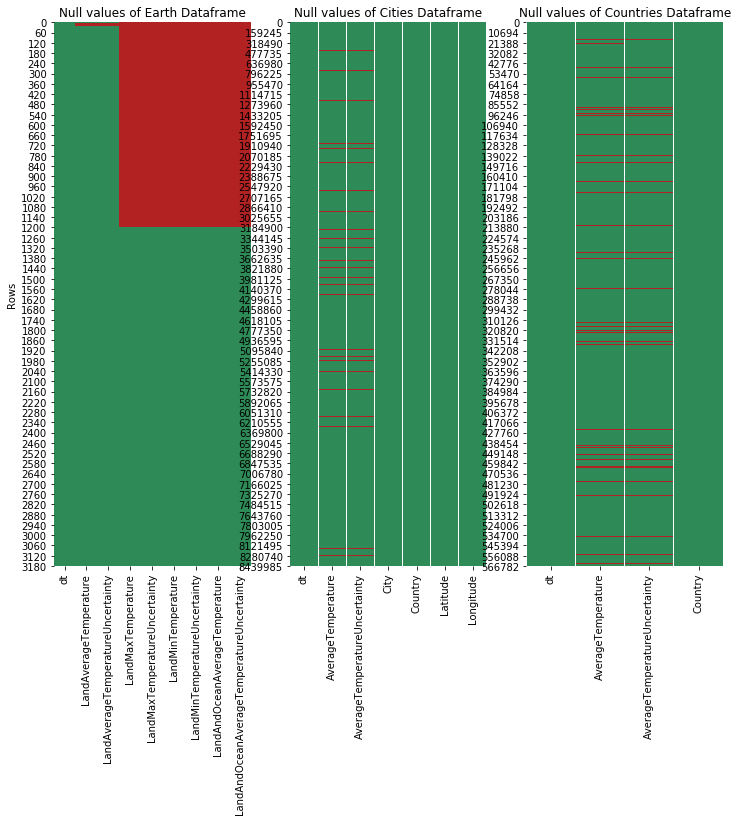

In [8]:
# Heatmaps for null values in the dataset

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
plt.sca(ax1)
ax1 = sns.heatmap(earth.isnull(), cbar=False, cmap=['seagreen', 'firebrick'])
plt.title('Null values of Earth Dataframe')
plt.ylabel('Rows')
plt.sca(ax2)
ax2 = sns.heatmap(cities.isnull(), cbar=False, cmap=['seagreen', 'firebrick'])
plt.title('Null values of Cities Dataframe')
plt.sca(ax3)
plt.title('Null values of Countries Dataframe')
ax3 = sns.heatmap(countries.isnull(), cbar=False, cmap=['seagreen', 'firebrick'])

According to the heatmap plot, we can see Earth dataframe has a compleate records for Land Temperature, however the first 1/3 of the dataframe lacks data for the other columns(Releted with Min/Max temperature, and Ocean Temperature).
Cities Dataframe has a great % of non-missing values, only lacking in some non-continuous parts.

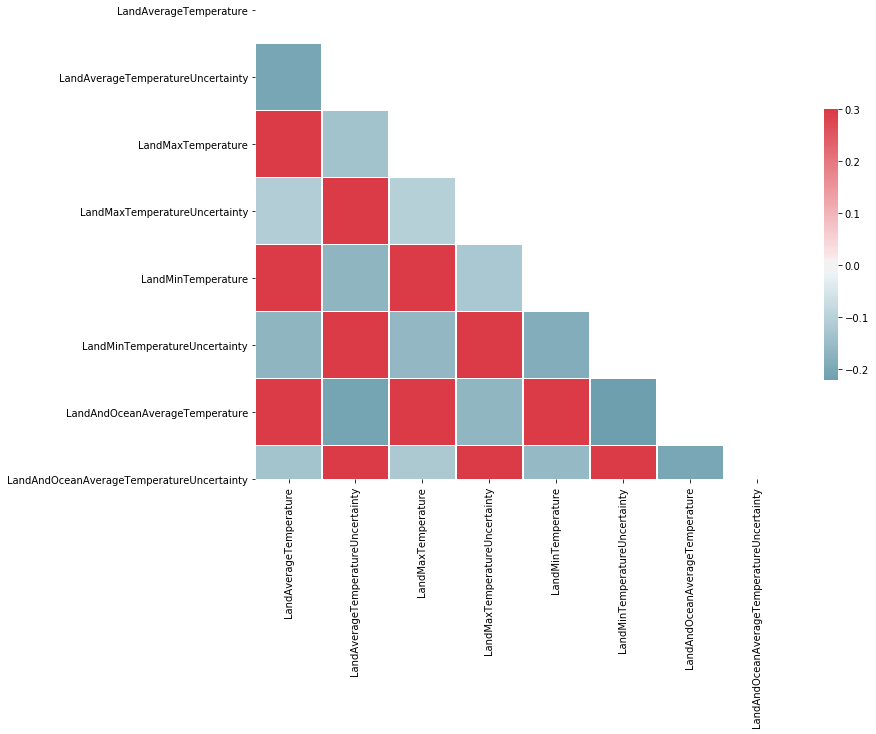

In [9]:
## Explore correlations between the variables in Earth Dataframe

# Compute the correlation matrix
corr = earth.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# Remove the duplicated countries and "colonies"

countries = countries[~countries.Country.str.contains('Europe')]
countries[countries['Country'] == 'Africa'].isna().sum()

dt                                0
AverageTemperature               71
AverageTemperatureUncertainty    71
Country                           0
dtype: int64

In [11]:
def get_season(month):
    '''
    Given a Month (integer) return the Meteorological Season
    '''
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'


In [12]:
countries['dt'] = pd.to_datetime(countries['dt'])
countries['Year'] = countries['dt'].map(lambda x: x.year).astype('int64')
countries['Month'] = countries['dt'].map(lambda x: x.month).astype('int64')
countries['Day'] = countries['dt'].map(lambda x: x.day).astype('int64')

countries['Season'] = countries['Month'].apply(get_season)

# After getting the season, we need the month as string for plot issues
month_map = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
countries['Month'] = countries['Month'].map(month_map)

# After getting the season, we need the month as string for plot issues
countries['Month'] = pd.Categorical(countries['Month'], ordered=True, categories= ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])

In [13]:
countries

dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1743-11-01               4.384                          2.294   
1      1743-12-01                 NaN                            NaN   
2      1744-01-01                 NaN                            NaN   
3      1744-02-01                 NaN                            NaN   
4      1744-03-01                 NaN                            NaN   
...           ...                 ...                            ...   
577457 2013-05-01              19.059                          1.022   
577458 2013-06-01              17.613                          0.473   
577459 2013-07-01              17.000                          0.453   
577460 2013-08-01              19.759                          0.717   
577461 2013-09-01                 NaN                            NaN   

         Country  Year Month  Day  Season  
0          Åland  1743   Nov    1  Autumn  
1          Åland  1743   Dec    1  Winter  
2          Åland  1744   Jan    1  Winter  
3          Åland  1744   Feb    1  Winter  
4          Åland  1744   Mar    1  Spring  
...          ...   ...   ...  ...     ...  
577457  Zimbabwe  2013   May    1  Spring  
577458  Zimbabwe  2013   Jun    1  Summer  
577459  Zimbabwe  2013   Jul    1  Summer  
577460  Zimbabwe  2013   Aug    1  Summer  
577461  Zimbabwe  2013   Sep    1  Autumn  

[561267 rows x 8 columns]

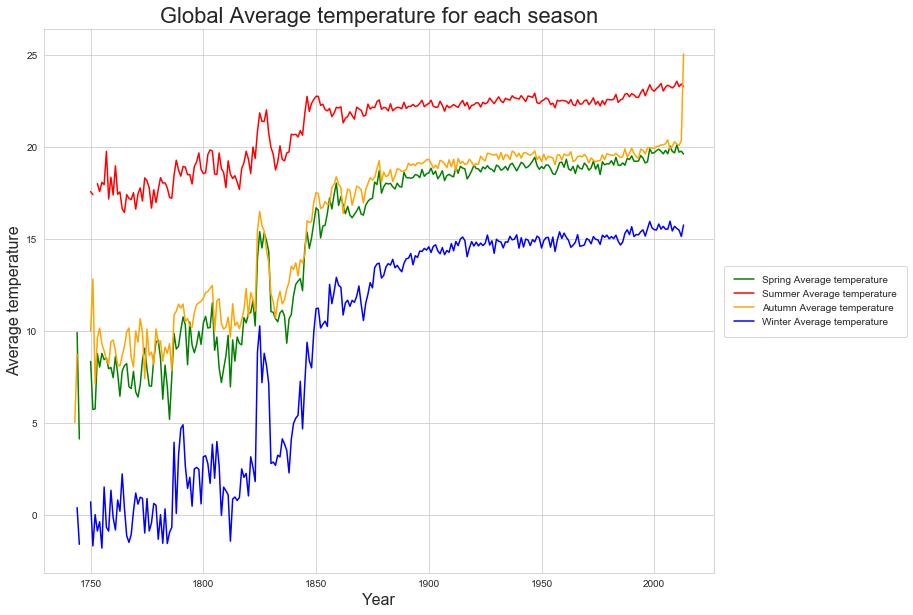

In [14]:
season_countries = countries.groupby(['Season', 'Year'])['AverageTemperature'].mean().reset_index()

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 10))


plt.plot(season_countries['Year'][season_countries['Season'] == 'Spring'], season_countries['AverageTemperature'][season_countries['Season'] == 'Spring'], label='Spring Average temperature', color='green')
plt.plot(season_countries['Year'][season_countries['Season'] == 'Summer'], season_countries['AverageTemperature'][season_countries['Season'] == 'Summer'], label='Summer Average temperature', color='red')
plt.plot(season_countries['Year'][season_countries['Season'] == 'Autumn'], season_countries['AverageTemperature'][season_countries['Season'] == 'Autumn'], label='Autumn Average temperature', color='orange')
plt.plot(season_countries['Year'][season_countries['Season'] == 'Winter'], season_countries['AverageTemperature'][season_countries['Season'] == 'Winter'], label='Winter Average temperature', color='blue')

ax.set_ylabel('Average temperature', size=16)
ax.set_xlabel('Year', size=16)
ax.set_title('Global Average temperature for each season', size=22)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

### Annual Temperature by country - Data Transformation

In [15]:
# Extract longitude and latitude from cities dataframe
countries_geo = cities.groupby(['Latitude', 'Longitude']).agg({'Country':'last'}).drop_duplicates(subset='Country').reset_index()
countries_geo.shape

# Append the continent & iso codes
continent_map = pd.read_csv("data/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

In [16]:
countries_geo = cities.groupby(['Latitude', 'Longitude']).agg({'Country':'last'}).drop_duplicates(subset='Country').reset_index()
countries_geo.head()

Latitude Longitude                             Country
0    0.80N   103.66E                           Singapore
1    0.80N   108.48E                           Indonesia
2    0.80N   110.09E                            Malaysia
3    0.80N    18.48E  Congo (Democratic Republic Of The)
4    0.80N    32.95E                              Uganda

In [17]:
# Merge DataFrames
countries_geomap = pd.merge(left=continent_map, right=countries_geo, on='Country', how='left')
countries_geomap.shape

(249, 6)

In [18]:
# Merge Countries DataFrame (countries) with Latitude-Longitude DataFrame (countries_geo)
countries = pd.merge(left = countries, right = countries_geomap, on = 'Country', how = 'left')
countries.head()


dt  AverageTemperature  AverageTemperatureUncertainty Country  Year  \
0 1743-11-01               4.384                          2.294   Åland  1743   
1 1743-12-01                 NaN                            NaN   Åland  1743   
2 1744-01-01                 NaN                            NaN   Åland  1744   
3 1744-02-01                 NaN                            NaN   Åland  1744   
4 1744-03-01                 NaN                            NaN   Åland  1744   

  Month  Day  Season region alpha-2 alpha-3 Latitude Longitude  
0   Nov    1  Autumn    NaN     NaN     NaN      NaN       NaN  
1   Dec    1  Winter    NaN     NaN     NaN      NaN       NaN  
2   Jan    1  Winter    NaN     NaN     NaN      NaN       NaN  
3   Feb    1  Winter    NaN     NaN     NaN      NaN       NaN  
4   Mar    1  Spring    NaN     NaN     NaN      NaN       NaN

In [19]:
# Global Temperatures anomalies by country

## Group by Year and Country and calculate the mean temperature

anomalies = countries.groupby(['Year', 'Country', 'region', 'Latitude', 'Longitude', 'alpha-3'])['AverageTemperature'].mean().reset_index()

## 1) Calculate the mean for (1951-1980) period as base for each country

mean_period = anomalies[(anomalies['Year'] >= 1951) & (anomalies['Year'] <= 1980)].groupby('Country')['AverageTemperature'].mean()

## 2) Calculate the anomalies in temperatures (diference between Mean Year and Mean Period)

anomalies['Mean Period'] = [mean_period[country] for country in anomalies['Country']]
anomalies['Diference'] = anomalies['AverageTemperature'] - anomalies['Mean Period']

## 3) Plot the differences 

anomalies[anomalies['Year'] > 1850]

Year      Country    region Latitude Longitude alpha-3  \
5983   1851  Afghanistan      Asia   31.35N    65.97E     AFG   
5984   1851      Albania    Europe   40.99N    19.17E     ALB   
5985   1851      Algeria    Africa   31.35N     5.65E     DZA   
5986   1851      Armenia      Asia   40.99N    44.73E     ARM   
5987   1851      Austria    Europe   47.42N    13.03E     AUT   
...     ...          ...       ...      ...       ...     ...   
30082  2013    Venezuela  Americas   10.45N    63.00W     VEN   
30083  2013      Vietnam      Asia   10.45N   105.55E     VNM   
30084  2013        Yemen      Asia   13.66N    43.76E     YEM   
30085  2013       Zambia    Africa   12.05S    27.95E     ZMB   
30086  2013     Zimbabwe    Africa   18.48S    30.42E     ZWE   

       AverageTemperature  Mean Period  Diference  
5983            13.605667    14.060847  -0.455181  
5984            12.315500    12.788322  -0.472822  
5985            22.733333    23.097517  -0.364183  
5986             9.011833     8.912531   0.099303  
5987             5.391250     6.315831  -0.924581  
...                   ...          ...        ...  
30082           25.912875    25.317511   0.595364  
30083           25.232125    23.967503   1.264622  
30084           28.129750    26.275844   1.853906  
30085           21.196000    21.312500  -0.116500  
30086           20.710750    21.169989  -0.459239  

[24104 rows x 9 columns]

### Interactive Map of Anomalies

In [20]:
# Select only data After Industrial Revolution (1850)
map_countries = anomalies[anomalies['Year'] >= 1850]

#modificar range_color
fig = px.scatter_geo(map_countries.dropna(axis=0), locations='alpha-3', color='Diference',
                     color_continuous_scale = 'solar_r',
                     hover_name="Country", opacity = 1,
                     animation_frame="Year", 
                     range_color=[map_countries['Diference'].min() + 6, map_countries['Diference'].max()],
                     projection="natural earth", title='Interactive Globe Map - Anomalies in Temperatures')
fig.show()

In [21]:
#filtering Starting year 1800
anomalies = anomalies[anomalies['Year'] > 1800]

@interact
def eda(continent=['Europe','Asia','Africa', 'Americas', 'Oceania']):
    
    # Spider plot by Europe region
    fig = px.bar_polar(anomalies[anomalies['region'] == continent], r='AverageTemperature', theta='Country', 
                   color='AverageTemperature', 
                   color_continuous_scale=px.colors.sequential.solar_r, 
                   template='plotly_dark',
                   title='Interactive Spider Plot by Continent', 
                   animation_frame='Year')
    fig.show()

interactive(children=(Dropdown(description='continent', options=('Europe', 'Asia', 'Africa', 'Americas', 'Ocea…

In [22]:
@interact (Country="")
def barspider(Country):
    fig = px.bar_polar(countries[(countries['Country'] == Country) & (countries['Year'] > 1800)], 
                   r='AverageTemperature', theta='Month', color='AverageTemperature', 
                   color_continuous_scale=px.colors.sequential.solar_r, 
                       title='Interactive Spider Plot by Month', 
                       animation_frame='Year',
                       template='plotly_dark')
    fig.show()

interactive(children=(Text(value='', description='Country'), Output()), _dom_classes=('widget-interact',))

## Decomposing Time Series

In [23]:
### Plot the global temperature by Year

(1800, 2015)

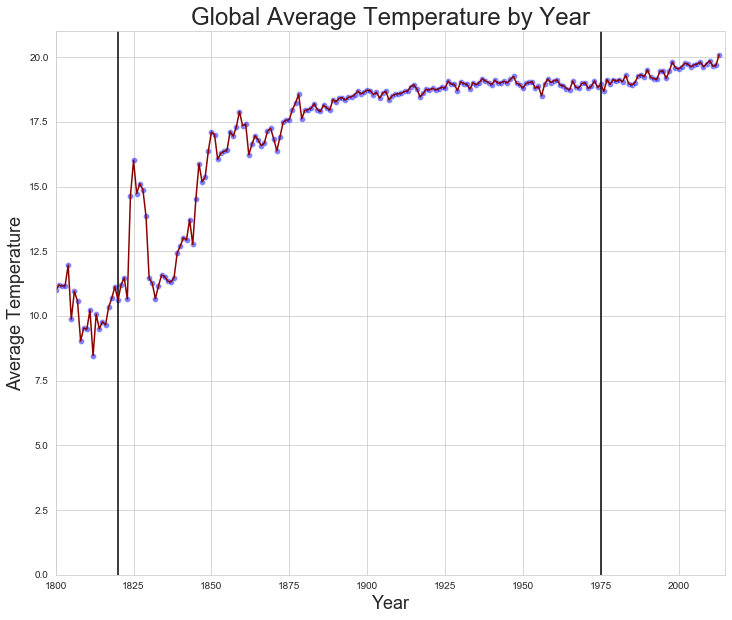

In [24]:
global_countries = countries[countries['Year'] >= 1800].groupby(['Year'])['AverageTemperature'].mean().reset_index()

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

sns.scatterplot(data=global_countries, x='Year', y='AverageTemperature', alpha=0.5, color='blue')
sns.lineplot(data=global_countries, x='Year', y='AverageTemperature', color = 'darkred')
plt.ylabel('Average Temperature', size = 18)
plt.xlabel('Year', size = 18)
plt.title('Global Average Temperature by Year', size=24)
plt.vlines(x=[1820,1975], ymin=0, ymax=21)
plt.ylim(0,21)
plt.xlim(1800,2015)

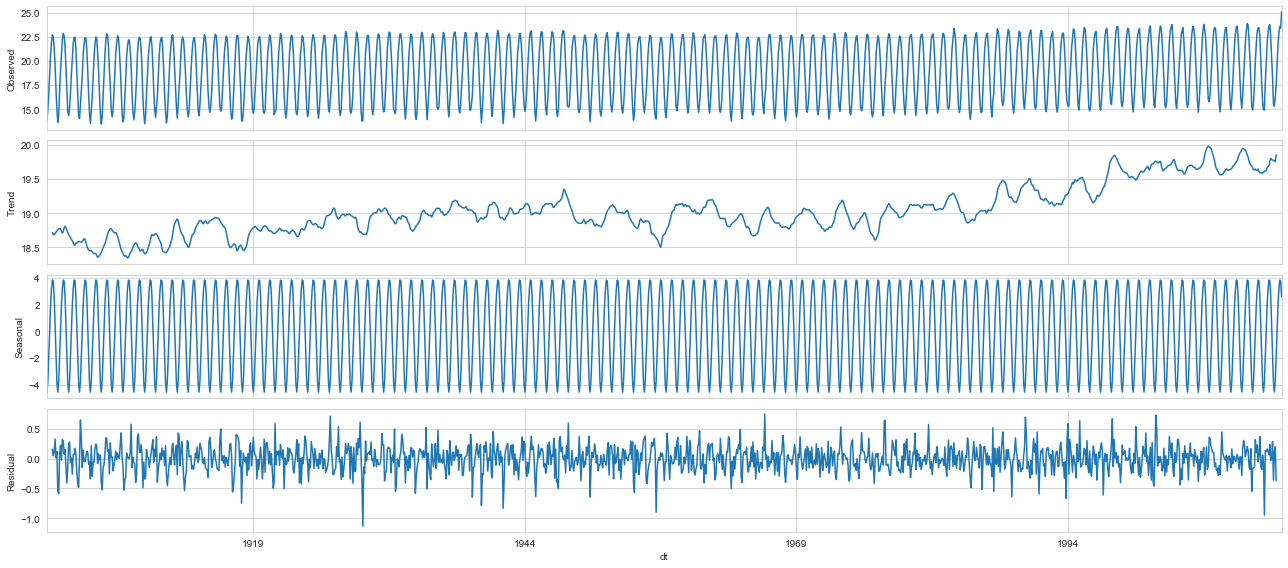

In [25]:
## Prediction Model

from pylab import rcParams
import statsmodels.api as sm

statistic = countries[countries['Year'] >= 1900].groupby('dt')['AverageTemperature'].mean()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(statistic.dropna(), freq=12, model='additive')
fig = decomposition.plot()
plt.show()

In [26]:
## Try ARIMA model to prediction of time series

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [27]:
mod = sm.tsa.statespace.SARIMAX(statistic,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False,)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4276      0.024     17.539      0.000       0.380       0.475
ma.L1         -1.0000      1.057     -0.946      0.344      -3.071       1.071
ar.S.L12      -0.5464      0.021    -26.113      0.000      -0.587      -0.505
sigma2         0.0917      0.098      0.937      0.349      -0.100       0.283


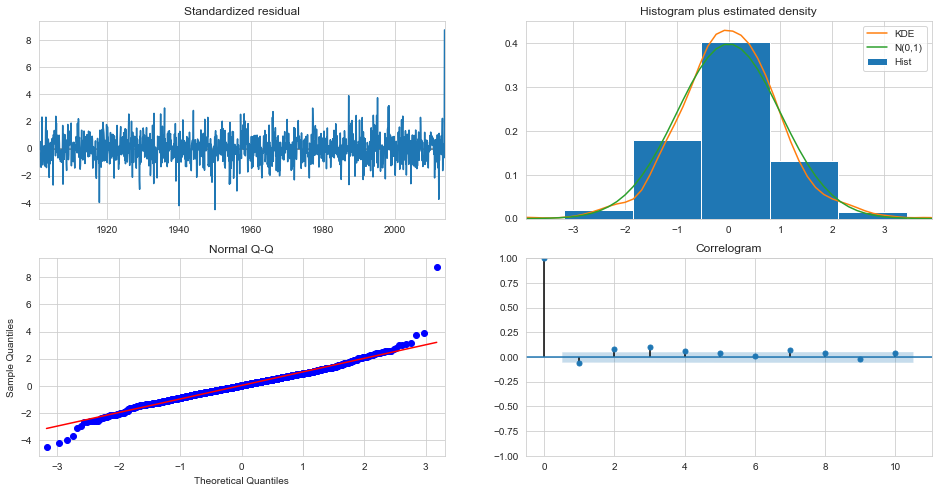

In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

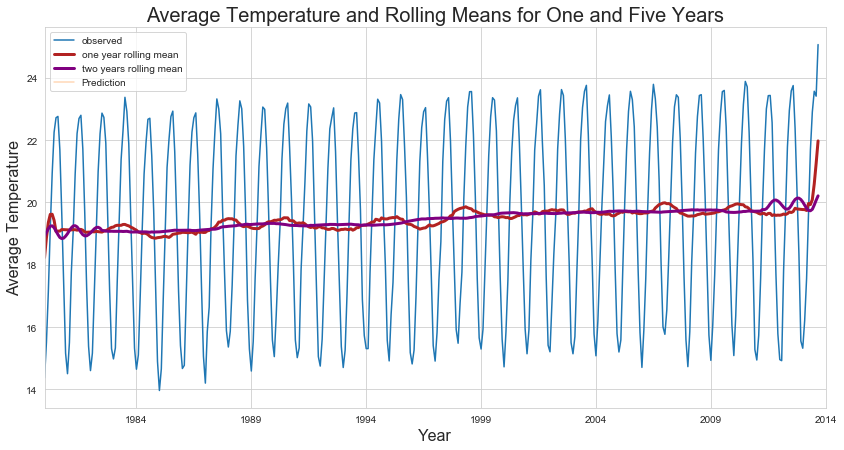

In [29]:
# Modelo estadístico de predicción

pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = statistic['1980':].plot(label='observed')

# Rolling means of 1 and 5 years
one_year_mean = statistic['1980':].rolling(window=12, center=True, min_periods=6).mean()
five_year_mean = statistic['1980':].rolling(window=60, center=True, min_periods=20).mean()


# Plot
one_year_mean.plot(color='firebrick', linewidth=3, label='one year rolling mean')
five_year_mean.plot(color='purple', linewidth=3, label='two years rolling mean')


pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.3, figsize=(14, 7))

ax.set_xlabel('Year', size=16)
ax.set_ylabel('Average Temperature', size=16)
plt.title('Average Temperature and Rolling Means for One and Five Years', size=20)
plt.legend()
plt.show()


